### Computing Historical Volatility

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# For making attractive and informative statistical graph
plt.style.use('seaborn-darkgrid')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import pandas_datareader as pdr
from datetime import datetime

data = pdr.get_data_yahoo(symbols='AAPL', start=datetime(2016, 4, 20), end=datetime(2018, 4, 13))
data.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-04-20,108.089996,106.059998,106.639999,107.129997,30611000.0,101.339020
2016-04-21,106.930000,105.519997,106.930000,105.970001,31552500.0,100.241730
2016-04-22,106.480003,104.620003,105.010002,105.680000,33683100.0,99.967400
2016-04-25,105.650002,104.510002,105.000000,105.080002,28031600.0,99.399841
2016-04-26,105.300003,103.910004,103.910004,104.349998,56016200.0,98.709282


### Computing Log Returns
Now we will compute the daily log returns by using the shift() function for adjusted closing prices of the security. We make use of the numpy library for computing log of today's closing price divided by yesterday's closing price. The log returns are stored in the DataFrame data under the column header 'Log Returns'.

In [14]:
data['Log Returns'] = np.log(data['Adj Close']/data['Adj Close'].shift(1))

### Computing Historical Volatility
The one month (or 20 trading days) historical volatility will be computed by using the DataFrame.rolling(window).std() function which computes the rolling standard deviation of data['Log Returns'] for a period of 20 trading days. The standard deviation is multiplied by 100 to compute the percentage value for volatility. The historical volatility will be stored in the DataFrame under the column header '20 day Historical Volatility'.

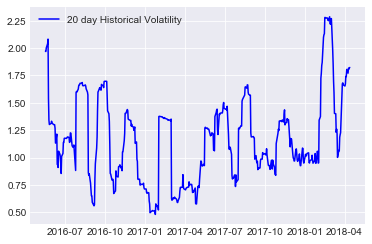

In [15]:
data['20 day Historical Volatility'] = 100*data['Log Returns'].rolling(window=20).std()
plt.plot(data['20 day Historical Volatility'], color = 'b', label ='20 day Historical Volatility')
plt.legend(loc='best')
plt.show()
